In [1]:
import pandas as pd
import numpy as np
from word2number import w2n
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [2]:
df_activity = pd.read_csv("Customer Flight Activity.csv", index_col=0)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

# FASE 1

# 1. **Exploración Inicial:**

   - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

   - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

   - Une los dos conjuntos de datos de la forma más eficiente. 

In [3]:
df_activity.sample(5)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
241468,2018,12,11,0,11,3069,306.0,0,0
596004,2017,8,6,6,12,4536,453.0,728,59
508824,2017,3,1,1,2,2064,206.0,0,0
698390,2018,4,0,0,0,0,0.0,0,0
447804,2018,2,6,3,9,2907,313.2,302,25


Echamos un primer vistazo a los datos para ver qué tipo de columnas tenemos.

In [4]:
df_activity.columns

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

En este caso aparece "LOYALTY NUMBER" que es el identificador por cliente, nos aparece como index y nos conviene que nos aparezca como columna.

Vamos a pasar el LOYALTY NUMBER a columna:

In [5]:
df_activity = df_activity.reset_index()

In [6]:
df_activity.shape

(405624, 10)

Vemos que en este caso contamos con 405.624 filas y 9 columnas

In [7]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


Comprobamos que los datos están con el tipo correcto para poder trabajar con ellos y además vemos el numero de nulos que tenemos en cada columna, en este caso el documento no tiene nulos, lo que es un buen comienzo.

In [8]:
df_activity.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

Por comodidad vamos a quitar los espacios de los nombres de las columnas 

In [9]:
df_activity.columns = df_activity.columns.str.replace(' ', '')

# 2. **Limpieza de Datos:**
   - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
   - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
   - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [10]:
total_duplicadas=df_activity.duplicated().sum()
print(f"Total de filas duplicadas: {total_duplicadas}")

Total de filas duplicadas: 1864


In [11]:
df_activity.drop_duplicates(inplace=True)
print("Número de filas después de eliminar duplicados exactos:", len(df_activity))

Número de filas después de eliminar duplicados exactos: 403760


Tras eliminar los duplicados, observar que no hay nulos y que le tipo de las columnas es correcto, finalizamos el tratamiento del documento.


Pasamos la funcion de #EDA para darle un último vistazo y comprobar que todo está bien

In [12]:

def eda(df_activity):
    print("========== RESUMEN GENERAL ==========")
    print(f"Filas x Columnas (shape): {df_activity.shape}")
    
    print("\nColumnas:")
    print(df_activity.columns.tolist())

    print("\nDtypes:")
    print(df_activity.dtypes)

    print("\nNulos por columna:")
    print(df_activity.isnull().sum())

    print("\n========== DESCRIBE NUMÉRICO ==========")
    print(df_activity.describe().T)

    
    col_categoricas = df_activity.select_dtypes(include=["object", "category"]).columns.tolist()
    if len(col_categoricas) > 0:

        print("\n========== DESCRIBE CATEGÓRICO (object/category) ==========")
        print(df_activity.describe(include=["object", "category"]).T)
    else:
        print("\n No hay columnas categóricas en el DataFrame.")

    print("\n========== HEAD ==========")
    print(df_activity.head(2))
    
    print("\n========== TAIL ==========")
    print(df_activity.tail(2))
    
    print("\n========== SAMPLE ==========")
    print(df_activity.sample(2))

    print("\n========== VALUE COUNTS (por columna categórica) ==========")
    if len(col_categoricas) > 0:
        for col in col_categoricas:
            print(f"\nColumna: {col}")
            print(df_activity[col].value_counts().head(3))
    else:
        print(" No hay columnas categóricas para mostrar value counts.")

    print("\n========== DUPLICADOS ==========")
    duplicados = df_activity[df_activity.duplicated()]
    print(f"Duplicados encontrados: {duplicados.shape[0]}")
    
    if duplicados.shape[0] > 0:
        print(duplicados.head())
        print("\nBorrando duplicados (sin modificar original):")
        df_sin_dups = df_activity.drop_duplicates()
        print(f"Nuevo tamaño sin duplicados: {df_sin_dups.shape}")
    else:
        print(" No hay duplicados.")

    print("\n========== HISTOGRAMAS NUMÉRICOS ==========")
    df_activity.hist(bins=20, figsize=(25, 25))
    plt.suptitle("Distribución de variables numéricas", fontsize=16)
    plt.show()

    if len(col_categoricas) > 0:
        print("\n========== BARRAS CATEGÓRICAS ==========")
        for c in col_categoricas:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=c, data=df_activity, palette='Set2')
            plt.xticks(rotation=45)
            plt.title(f"Distribución de {c}", fontsize=14)
            plt.xlabel(c)
            plt.ylabel("Frecuencia")
            plt.show()
    else:
        print("\n No hay variables categóricas para graficar.")

    print("\n EDA completado con éxito.")


========== RESUMEN GENERAL ==========
Filas x Columnas (shape): (403760, 10)

Columnas:
['LoyaltyNumber', 'Year', 'Month', 'FlightsBooked', 'FlightswithCompanions', 'TotalFlights', 'Distance', 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']

Dtypes:
LoyaltyNumber                 int64
Year                          int64
Month                         int64
FlightsBooked                 int64
FlightswithCompanions         int64
TotalFlights                  int64
Distance                      int64
PointsAccumulated           float64
PointsRedeemed                int64
DollarCostPointsRedeemed      int64
dtype: object

Nulos por columna:
LoyaltyNumber               0
Year                        0
Month                       0
FlightsBooked               0
FlightswithCompanions       0
TotalFlights                0
Distance                    0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

========== DESCRIBE NUM

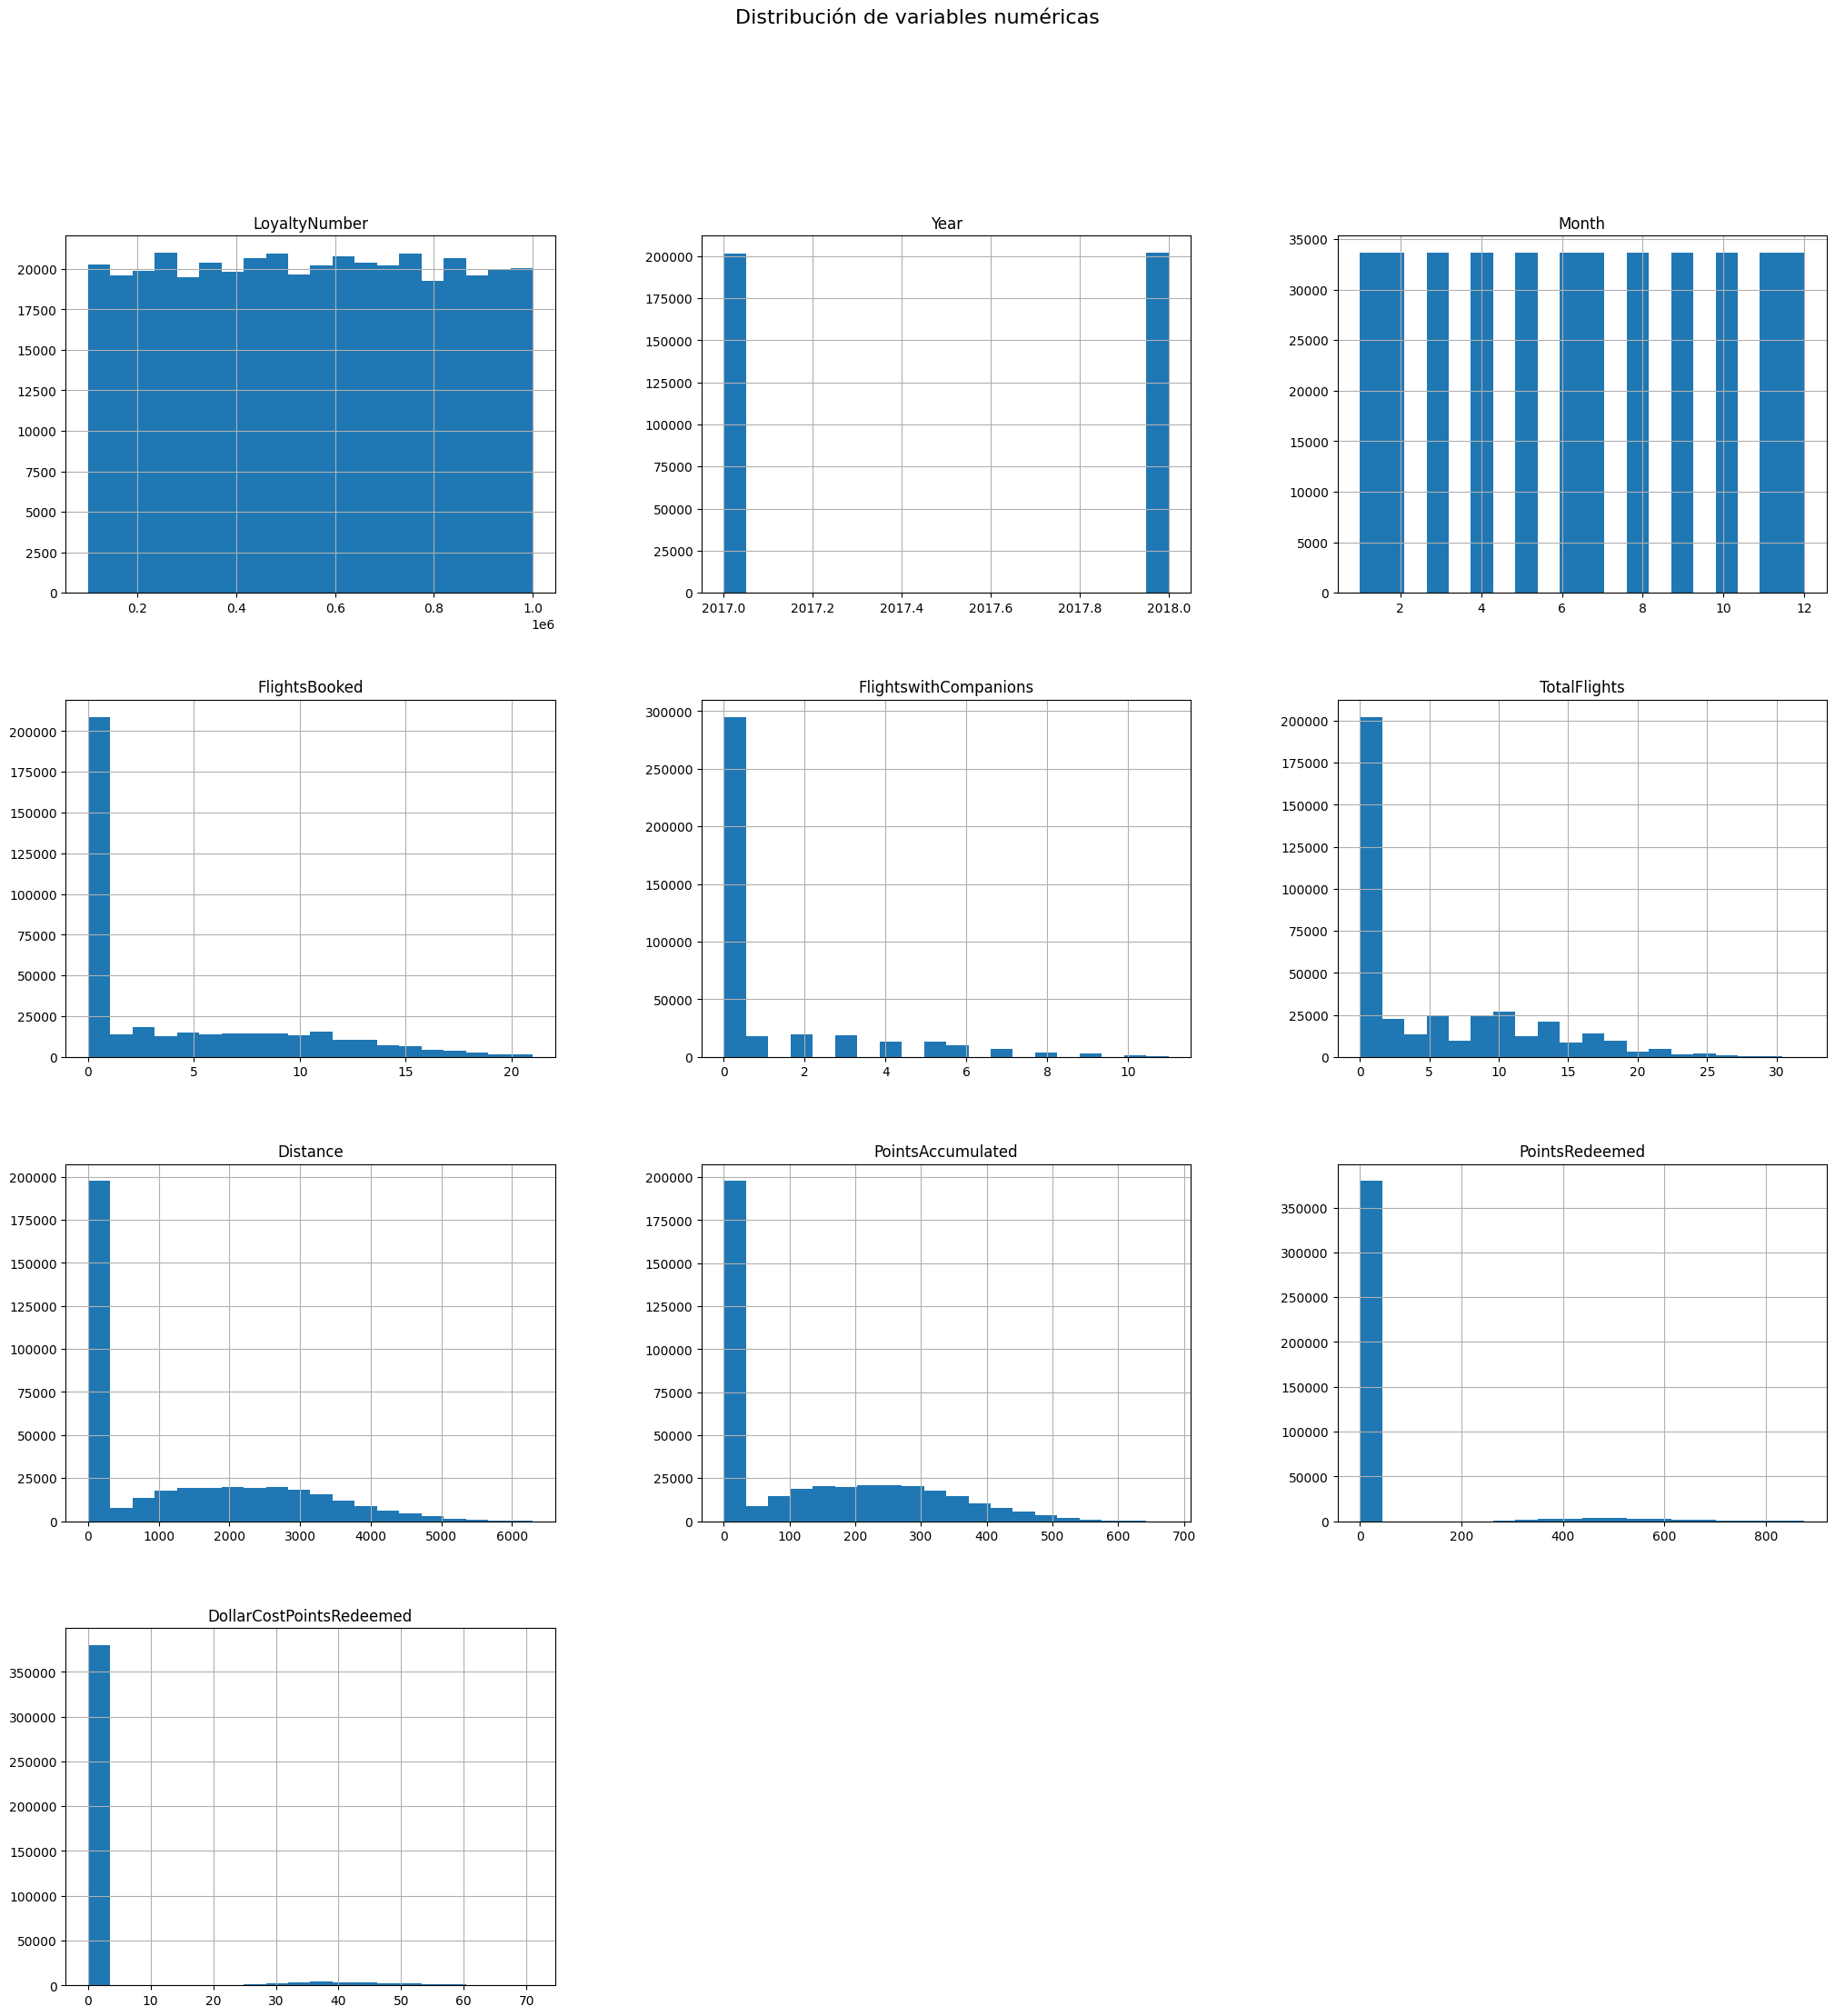


 No hay variables categóricas para graficar.

 EDA completado con éxito.


In [13]:
eda(df_activity)

A continuación procedemos a guardar el CSV tratado:

In [14]:
df_activity.to_csv('df_activity_clean.csv', index=False)